# Project No-3

TITANIC PROJECT

Neetu Bam ,DS0622,neetu.k.bam@gmail.com

In [1]:
#import liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')


In [2]:
train_data=pd.read_csv("titanic.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:xlabel='Survived', ylabel='count'>

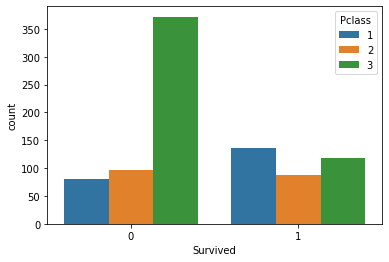

In [3]:
sns.countplot(x='Survived',data=train_data,hue='Pclass')

<AxesSubplot:xlabel='Age'>

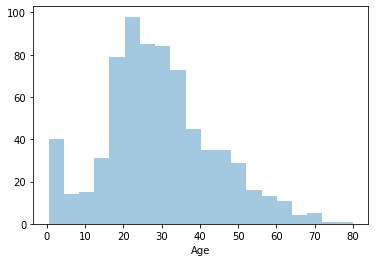

In [4]:
sns.distplot(train_data['Age'],kde=False)

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

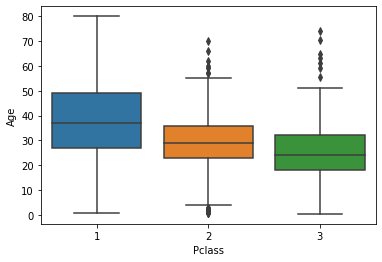

In [7]:
sns.boxplot(x='Pclass',y='Age',data=train_data)

In [8]:
print(train_data[train_data['Pclass'] == 1] ['Age'].mean())
print(train_data[train_data['Pclass'] == 2] ['Age'].mean())
print(train_data[train_data['Pclass'] == 3] ['Age'].mean())


38.233440860215055
29.87763005780347
25.14061971830986


In [9]:
def fill_in_na_values(cols):
    age=cols[0]
    pclass=cols[1]
    
    if pd.isnull(age):
        if pclass==1:
            return round(train_data[train_data['Pclass']==1]['Age'].mean())
        elif pclass==2:
            return round(train_data[train_data['Pclass']==2]['Age'].mean())
        elif pclass==3:
            return round(train_data[train_data['Pclass']==3]['Age'].mean())
    else:
        return age
train_data['Age']=train_data[['Age','Pclass']].apply(fill_in_na_values,axis=1)



In [10]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

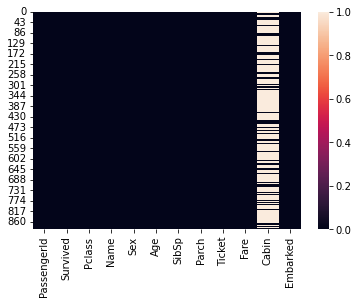

In [11]:
sns.heatmap(train_data.isnull())

In [12]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
train_data.drop(['Cabin'],axis=1,inplace=True)

In [14]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [15]:
train_data.dropna(inplace=True)

In [16]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [17]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [18]:
train_data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [19]:
train_data['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [20]:
sex=pd.get_dummies(train_data['Sex'],drop_first=True)
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [21]:
#Data Analysis
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.218414,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,13.178017,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,36.500000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [22]:
#find the no of people survived and not survived
train_data['Survived'].value_counts()

0    549
1    340
Name: Survived, dtype: int64

In [23]:
#Data visualization
sns.set()

<AxesSubplot:xlabel='Survived', ylabel='count'>

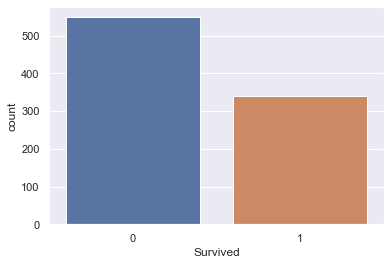

In [24]:
sns.countplot('Survived',data=train_data)

In [25]:
train_data['Sex'].value_counts()

male      577
female    312
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

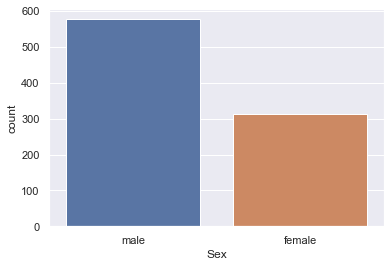

In [26]:
sns.countplot('Sex',data=train_data)

<AxesSubplot:xlabel='Sex', ylabel='count'>

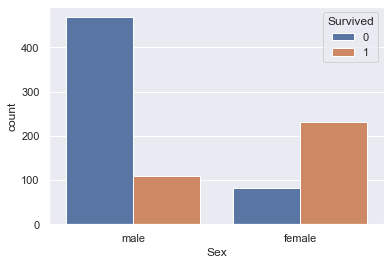

In [27]:
#no of survivorsGender wise
sns.countplot('Sex',hue='Survived',data=train_data)

In [28]:
train_data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [29]:
#converting categorical columns

train_data.replace ({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

In [30]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


Separating features & targets

In [31]:
X=train_data.drop(columns=['PassengerId','Name','Ticket','Survived'],axis=1)
Y=train_data['Survived']
                           
                           

In [32]:
print(X)

     Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         3    0  22.0      1      0   7.2500         0
1         1    1  38.0      1      0  71.2833         1
2         3    1  26.0      0      0   7.9250         0
3         1    1  35.0      1      0  53.1000         0
4         3    0  35.0      0      0   8.0500         0
..      ...  ...   ...    ...    ...      ...       ...
886       2    0  27.0      0      0  13.0000         0
887       1    1  19.0      0      0  30.0000         0
888       3    1  25.0      1      2  23.4500         0
889       1    0  26.0      0      0  30.0000         1
890       3    0  32.0      0      0   7.7500         2

[889 rows x 7 columns]


In [33]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64


In [34]:
#splitting the data into training data and test data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [35]:
print(X.shape,X_train.shape,X_test.shape)

(889, 7) (711, 7) (178, 7)


Model training

In [36]:
model=LogisticRegression()

In [37]:
model.fit(X_train,Y_train)

LogisticRegression()

model Evaluation

Accuracy Score

In [38]:
X_train_prediction=model.predict(X_train)

In [39]:
print(X_train_prediction)

[0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 1 0 0 1 0 1 0 1 0 1 1 0 0
 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 0
 1 0 1 0 0 1 0 0 1 0 0 1 1 0 1 0 1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1
 1 1 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1
 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 0 0 1 1 0 0 0 0 0 0 0
 1 0 0 0 1 0 1 0 0 0 1 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 0
 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 1 1 0 0 1 0 0 1 1 1 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1
 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 1 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1 0 0
 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1 1
 1 0 0 1 0 0 0 1 0 1 0 0 

In [40]:
training_data_accuracy=accuracy_score(Y_train,X_train_prediction)
print("Accuracy score of training data:",training_data_accuracy)

Accuracy score of training data: 0.8143459915611815


In [41]:
#accuracy of test data
X_test_prediction=model.predict(X_test)

In [42]:
print(X_test_prediction)

[0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 1
 1 0 0 0 1 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 0 0 0
 1 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 1 0 1 1 1 0 0 0
 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1 1 1 0 0 0 0
 0 0 0 0 0 1 1 0 1 0 1 1 1 1 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0]


In [43]:
test_data_accuracy=accuracy_score(Y_test,X_test_prediction)
print("Accuracy score of test data:",test_data_accuracy)

Accuracy score of test data: 0.8033707865168539


In [44]:
###############END################